In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.formula. api as sm
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('DC_Properties.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
df.isnull().sum()

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY          

In [4]:
df.fillna(0, inplace = True)
df

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158952,158952,1,0,Forced Air,Y,0.0,3,1,1938.0,2006.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,0,Ward 6,477,-77.019422,38.911848,NW
158953,158953,1,0,Forced Air,Y,0.0,4,2,1938.0,2006.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,0,Ward 6,477,-77.019422,38.911848,NW
158954,158954,2,0,Forced Air,Y,0.0,4,2,1920.0,2007.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,0,Ward 6,477,-77.019422,38.911848,NW
158955,158955,1,0,Warm Cool,Y,0.0,2,0,1965.0,0.0,...,-77.018230,Southwest Waterfront,0,11000.0,0,Ward 6,504,-77.018232,38.872961,SW


In [5]:
pd.set_option('display.max_columns', None) 
df.head()


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,0.0,0.0,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,0.0,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,0.0,0.0,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,0.0,0.0,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,0.0,0.0,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,0,0.0,U,1,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,0.0,0.0,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          158957 non-null  int64  
 1   BATHRM              158957 non-null  int64  
 2   HF_BATHRM           158957 non-null  int64  
 3   HEAT                158957 non-null  object 
 4   AC                  158957 non-null  object 
 5   NUM_UNITS           158957 non-null  float64
 6   ROOMS               158957 non-null  int64  
 7   BEDRM               158957 non-null  int64  
 8   AYB                 158957 non-null  float64
 9   YR_RMDL             158957 non-null  float64
 10  EYB                 158957 non-null  int64  
 11  STORIES             158957 non-null  float64
 12  SALEDATE            158957 non-null  object 
 13  PRICE               158957 non-null  float64
 14  QUALIFIED           158957 non-null  object 
 15  SALE_NUM            158957 non-nul

In [7]:
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,1.589570e+05,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000
mean,79478.000000,1.810678,0.458237,0.804155,6.187736,2.732506,1938.676755,1017.343388,1963.718024,1.403486,5.754615e+05,1.680033,1150.842983,1.000598,0.818385,2.374674,14.252999,2473.282158,779.703152,292.226086,20012.568663,38.914609,-77.016192,5348.182678,-76.901882,38.856825
std,45887.077707,0.976396,0.587571,0.745598,2.618165,1.358864,86.881492,999.028749,24.923150,2.595981,5.568976e+06,1.285898,1081.354371,0.031622,0.766195,737.295595,3.725736,5059.046023,1284.279329,482.070584,52.571889,0.102631,0.197463,3369.662055,2.971925,1.501840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-77.113909,0.000000,-77.113135,0.000000
25%,39739.000000,1.000000,0.000000,0.000000,4.000000,2.000000,1918.000000,0.000000,1954.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,11.000000,697.000000,0.000000,0.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042806,38.895407
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,1963.000000,1963.000000,2.000000,2.000000e+05,1.000000,1200.000000,1.000000,1.000000,0.000000,13.000000,1649.000000,0.000000,0.000000,20011.000000,38.915336,-77.019596,5201.000000,-77.019475,38.915205
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2004.000000,1975.000000,2.000000,4.790000e+05,2.000000,1670.000000,1.000000,1.000000,1.000000,17.000000,3000.000000,1471.000000,607.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988775,38.936064
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,1.374275e+08,15.000000,45384.000000,5.000000,44.000000,293920.000000,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,0.000000,11100.000000,0.000000,38.993646


In [8]:
df.drop(columns = ['Unnamed: 0','USECODE', 'BLDG_NUM','X','Y', 'CMPLX_NUM', 'LIVING_GBA' ], inplace = True)
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,1680,2018-07-22 18:01:43,Residential,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,0.0,U,1,2567.0,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,1680,2018-07-22 18:01:43,Residential,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,1680,2018-07-22 18:01:43,Residential,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,1680,2018-07-22 18:01:43,Residential,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,0,0.0,U,1,5255.0,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,2032,2018-07-22 18:01:43,Residential,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW


In [9]:
df['PRICE'].replace('unknown', 0, inplace = True)
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,1680,2018-07-22 18:01:43,Residential,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,0.0,U,1,2567.0,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,1680,2018-07-22 18:01:43,Residential,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,1680,2018-07-22 18:01:43,Residential,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,1680,2018-07-22 18:01:43,Residential,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,0,0.0,U,1,5255.0,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,2032,2018-07-22 18:01:43,Residential,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW


In [10]:
df['BATHRM'].max()

14

In [11]:
df['HF_BATHRM'].max()

11

In [12]:
df['ROOMS'].max()

48

In [13]:
df['BEDRM'].max()

24

In [14]:
df['PRICE'].max()

137427545.0

In [15]:
df['PRICE'].min()

0.0

In [16]:
df['STORIES'].max()

826.0

In [17]:
df.corr()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,KITCHENS,FIREPLACES,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT
BATHRM,1.000000e+00,0.248759,0.481502,0.677751,0.655563,-0.014715,0.113797,0.269444,0.157771,-2.942690e-07,0.068399,0.648537,0.493796,-0.001632,0.287648,-0.019313,0.039901,-0.037839,-0.196311
HF_BATHRM,2.487590e-01,1.000000,0.188640,0.353825,0.375568,-0.006212,-0.004959,0.235645,0.163664,-1.248369e-02,0.002193,0.426696,0.195467,-0.001635,0.212534,-0.004126,0.040874,-0.014087,-0.072880
NUM_UNITS,4.815016e-01,0.188640,1.000000,0.739343,0.648683,-0.126296,-0.071555,0.083046,0.297332,-4.934621e-02,-0.043306,0.677776,0.969703,-0.002585,0.176700,-0.024499,-0.005915,0.044703,0.100163
ROOMS,6.777506e-01,0.353825,0.739343,1.000000,0.841309,-0.096387,-0.045177,0.158847,0.272704,-4.067945e-02,-0.034828,0.811391,0.738228,-0.003660,0.348184,-0.020188,0.032780,0.005911,-0.075610
BEDRM,6.555632e-01,0.375568,0.648683,0.841309,1.000000,-0.103270,-0.037401,0.168913,0.278027,-4.440439e-02,-0.024835,0.777845,0.652780,-0.004696,0.321066,-0.023625,0.042584,0.008164,-0.072037
AYB,-1.471518e-02,-0.006212,-0.126296,-0.096387,-0.103270,1.000000,-0.108143,0.269521,-0.059161,2.417407e-02,0.012875,-0.112352,-0.127677,0.000663,-0.029316,0.019759,-0.017336,0.000108,0.035618
YR_RMDL,1.137973e-01,-0.004959,-0.071555,-0.045177,-0.037401,-0.108143,1.000000,-0.221593,-0.036630,5.765238e-02,0.138186,-0.022855,-0.059554,0.002591,-0.029151,-0.025564,0.009974,-0.032310,-0.126844
EYB,2.694444e-01,0.235645,0.083046,0.158847,0.168913,0.269521,-0.221593,1.000000,0.073526,5.136615e-02,0.053879,0.217830,0.089057,0.000097,0.081796,0.013299,-0.024483,0.000102,0.036707
STORIES,1.577708e-01,0.163664,0.297332,0.272704,0.278027,-0.059161,-0.036630,0.073526,1.000000,-2.229122e-02,-0.015881,0.316243,0.295799,-0.001255,0.092178,-0.009961,0.008138,0.013517,0.013443
PRICE,-2.942690e-07,-0.012484,-0.049346,-0.040679,-0.044404,0.024174,0.057652,0.051366,-0.022291,1.000000e+00,0.001063,-0.031210,-0.046897,0.024071,-0.010282,-0.000164,0.009552,-0.016024,-0.055114


In [18]:
df['BATHRM'].value_counts()

1     74555
2     53325
3     20785
4      8119
5      1367
6       500
7       129
8        71
0        58
9        22
10       14
11        7
12        3
14        1
13        1
Name: BATHRM, dtype: int64

In [19]:
df['HF_BATHRM'].value_counts()

0     93148
1     59258
2      6186
3       289
4        56
5        12
6         3
7         3
9         1
11        1
Name: HF_BATHRM, dtype: int64

In [20]:
df['ROOMS'].value_counts()

6     37259
7     22338
4     20593
3     17759
5     16852
8     16327
9      7616
10     5909
2      5294
12     2929
11     2364
16     1346
13      766
14      595
15      310
20      148
0       138
18      124
1        96
17       77
19       41
21       20
23       10
22       10
24       10
25        6
28        5
27        2
39        2
41        1
32        1
48        1
37        1
34        1
26        1
31        1
40        1
29        1
35        1
30        1
Name: ROOMS, dtype: int64

In [21]:
df['BEDRM'].value_counts()

3     57864
2     34946
4     24893
1     24181
5      6898
0      5297
6      3090
8       792
7       750
9       123
10       62
12       34
11       13
13        4
15        3
16        2
14        2
20        1
24        1
19        1
Name: BEDRM, dtype: int64

In [22]:
df['EYB'].value_counts()

1957    12541
1954    12346
1967    10408
1964     9362
1960     7636
        ...  
1820        6
1914        5
1865        4
1886        4
1800        4
Name: EYB, Length: 135, dtype: int64

In [23]:
df['zscore_STORIES'] = np.abs(stats.zscore(df['STORIES']))
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,zscore_STORIES
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,1680,2018-07-22 18:01:43,Residential,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,0.0,U,1,2567.0,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,1680,2018-07-22 18:01:43,Residential,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,1680,2018-07-22 18:01:43,Residential,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,1680,2018-07-22 18:01:43,Residential,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,0,0.0,U,1,5255.0,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,2032,2018-07-22 18:01:43,Residential,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996


In [24]:
z_outliers = df.loc[df['zscore_STORIES'] > 3].index
print(z_outliers)

Int64Index([ 3737,  7546, 20491, 21170, 21930, 32184, 44488, 79841, 79853,
            85656, 88110, 94741],
           dtype='int64')


In [25]:
df.iloc[[3737, 7546, 20491, 21170, 21930, 32184, 44488, 79841, 79853,
            85656, 88110, 94741]]
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,zscore_STORIES
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,1680,2018-07-22 18:01:43,Residential,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,0.0,U,1,2567.0,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,1680,2018-07-22 18:01:43,Residential,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,1680,2018-07-22 18:01:43,Residential,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,1680,2018-07-22 18:01:43,Residential,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,0,0.0,U,1,5255.0,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,2032,2018-07-22 18:01:43,Residential,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996


In [26]:
df = df.drop(z_outliers)
print(df.shape)

(158945, 43)


In [27]:
df['PRICE'].groupby(df['BATHRM']).mean()

BATHRM
0     9.551979e+05
1     6.636222e+05
2     4.287583e+05
3     5.352163e+05
4     6.150447e+05
5     1.205135e+06
6     1.544310e+06
7     2.329446e+06
8     1.527080e+06
9     3.512280e+06
10    1.214643e+06
11    2.603571e+06
12    4.083333e+06
13    0.000000e+00
14    0.000000e+00
Name: PRICE, dtype: float64

In [28]:
df['PRICE'].groupby(df['HF_BATHRM']).mean()

HF_BATHRM
0     6.448674e+05
1     4.713052e+05
2     4.991081e+05
3     9.509074e+05
4     1.111472e+06
5     3.603292e+06
6     0.000000e+00
7     3.895000e+05
9     0.000000e+00
11    8.000000e+05
Name: PRICE, dtype: float64

In [29]:
df['PRICE'].groupby(df['ROOMS']).mean()

ROOMS
0     4.259309e+05
1     1.496786e+05
2     1.431866e+06
3     1.738302e+06
4     7.017448e+05
5     3.306502e+05
6     2.373682e+05
7     2.712664e+05
8     3.604553e+05
9     4.359990e+05
10    5.549575e+05
11    6.402916e+05
12    5.508621e+05
13    9.218637e+05
14    7.568855e+05
15    1.060551e+06
16    3.501754e+05
17    1.292935e+06
18    8.010369e+05
19    1.346778e+06
20    4.573399e+05
21    9.950000e+05
22    1.820700e+06
23    8.606280e+05
24    1.843490e+05
25    4.498333e+06
26    1.500000e+07
27    0.000000e+00
28    1.696700e+06
29    0.000000e+00
30    2.000000e+05
31    2.396029e+07
32    0.000000e+00
34    0.000000e+00
35    0.000000e+00
37    0.000000e+00
39    0.000000e+00
40    0.000000e+00
41    0.000000e+00
48    0.000000e+00
Name: PRICE, dtype: float64

In [30]:
df['PRICE'].groupby(df['BEDRM']).mean()

BEDRM
0     1.433802e+06
1     1.488610e+06
2     4.390287e+05
3     2.510548e+05
4     3.941339e+05
5     6.473356e+05
6     7.675279e+05
7     1.030610e+06
8     4.718914e+05
9     1.215699e+06
10    2.568747e+05
11    6.313723e+05
12    9.105765e+05
13    1.106250e+05
14    4.625000e+05
15    3.683333e+05
16    0.000000e+00
19    0.000000e+00
20    1.900000e+06
24    0.000000e+00
Name: PRICE, dtype: float64

In [31]:
df['PRICE'].groupby(df['BEDRM']).mean()

BEDRM
0     1.433802e+06
1     1.488610e+06
2     4.390287e+05
3     2.510548e+05
4     3.941339e+05
5     6.473356e+05
6     7.675279e+05
7     1.030610e+06
8     4.718914e+05
9     1.215699e+06
10    2.568747e+05
11    6.313723e+05
12    9.105765e+05
13    1.106250e+05
14    4.625000e+05
15    3.683333e+05
16    0.000000e+00
19    0.000000e+00
20    1.900000e+06
24    0.000000e+00
Name: PRICE, dtype: float64

In [32]:
df['PRICE'].groupby(df['STORIES']).mean()

STORIES
0.00    1.107161e+06
0.25    5.000000e+05
0.50    0.000000e+00
0.75    0.000000e+00
1.00    1.905425e+05
1.25    1.782108e+05
1.34    0.000000e+00
1.50    2.188326e+05
1.70    8.372500e+05
1.75    2.984824e+05
2.00    2.652784e+05
2.20    8.844615e+05
2.25    4.246073e+05
2.30    7.824000e+05
2.33    0.000000e+00
2.50    6.058440e+05
2.70    1.553699e+06
2.75    1.136548e+06
3.00    5.318299e+05
3.20    0.000000e+00
3.25    1.480725e+06
3.50    7.649493e+05
3.70    1.197500e+06
3.75    1.087567e+06
4.00    9.514769e+05
4.50    0.000000e+00
4.75    0.000000e+00
5.00    8.244545e+05
6.00    7.896429e+05
7.00    2.250000e+05
8.25    6.050000e+05
9.00    1.080388e+05
Name: PRICE, dtype: float64

In [33]:
df['PRICE'].groupby(df['SQUARE']).mean()

SQUARE
4       600692.307692
5            0.000000
13      327291.666667
14      452887.362069
15      166551.893939
            ...      
6250     73843.750000
6254     49386.782609
6271     70111.111111
6277     87831.083333
PAR     193504.468354
Name: PRICE, Length: 3512, dtype: float64

In [34]:
df['PRICE'].groupby(df['STYLE']).mean()

STYLE
0                  1.107838e+06
1 Story            1.949911e+05
1.5 Story Fin      2.121682e+05
1.5 Story Unfin    2.663725e+05
2 Story            2.665569e+05
2.5 Story Fin      6.140320e+05
2.5 Story Unfin    3.232714e+05
3 Story            5.619293e+05
3.5 Story Fin      8.039236e+05
3.5 Story Unfin    1.474402e+06
4 Story            9.802546e+05
4.5 Story Fin      2.131633e+05
4.5 Story Unfin    3.949500e+05
Bi-Level           2.993421e+05
Default            3.087311e+05
Outbuildings       5.613000e+04
Split Foyer        1.269335e+05
Split Level        3.178110e+05
Vacant             9.600000e+05
Name: PRICE, dtype: float64

In [35]:
df['PRICE'].groupby(df['GRADE']).mean()

GRADE
0                1.107838e+06
Above Average    2.417446e+05
Average          1.693540e+05
Excellent        6.714541e+05
Exceptional-A    1.333356e+06
Exceptional-B    2.074939e+06
Exceptional-C    2.964155e+06
Exceptional-D    2.720155e+06
Fair Quality     1.432206e+05
Good Quality     3.881757e+05
Low Quality      2.808333e+05
No Data          1.767105e+06
Superior         8.701270e+05
Very Good        5.169812e+05
Name: PRICE, dtype: float64

In [36]:
df['PRICE'].groupby(df['CITY']).mean()

CITY
0             1.097848e+06
WASHINGTON    3.147680e+05
Name: PRICE, dtype: float64

In [37]:
df['PRICE'].groupby(df['LANDAREA']).mean()

LANDAREA
0         657300.305556
1         463500.000000
2         635000.000000
3         321350.000000
4         251480.416667
              ...      
339658         0.000000
451804         0.000000
498734         0.000000
691817         0.000000
942632         0.000000
Name: PRICE, Length: 11359, dtype: float64

In [38]:
df['PRICE'].groupby(df['LANDAREA']).mean()

LANDAREA
0         657300.305556
1         463500.000000
2         635000.000000
3         321350.000000
4         251480.416667
              ...      
339658         0.000000
451804         0.000000
498734         0.000000
691817         0.000000
942632         0.000000
Name: PRICE, Length: 11359, dtype: float64

In [39]:
df['PRICE'].groupby(df['AYB']).mean()

AYB
0.0       2.250826e+05
1754.0    3.550000e+06
1765.0    1.100000e+06
1776.0    3.161667e+05
1780.0    5.787500e+05
              ...     
2015.0    5.863962e+05
2016.0    5.384840e+05
2017.0    7.806636e+05
2018.0    4.549231e+05
2019.0    0.000000e+00
Name: PRICE, Length: 221, dtype: float64

In [40]:
pd.crosstab(df['GRADE'], df['STRUCT'])

STRUCT,0,Default,Multi,Row End,Row Inside,Semi-Detached,Single,Town End,Town Inside,Vacant Land
GRADE,,,,,,,,,,
0,52261,0,0,0,0,0,0,0,0,0
Above Average,0,2,1128,4141,13281,3945,9369,65,169,0
Average,0,5,3116,4168,13929,10347,5769,8,13,0
Excellent,0,0,23,340,888,202,1936,0,1,0
Exceptional-A,0,0,11,95,226,98,388,0,0,0
Exceptional-B,0,0,0,26,36,11,204,0,0,0
Exceptional-C,0,0,0,5,5,6,76,0,0,0
Exceptional-D,0,1,0,1,0,0,73,0,0,0
Fair Quality,0,0,3,4,15,13,115,0,0,0


In [41]:
pd.crosstab(df['CNDTN'], df['STRUCT'])

STRUCT,0,Default,Multi,Row End,Row Inside,Semi-Detached,Single,Town End,Town Inside,Vacant Land
CNDTN,,,,,,,,,,
0,52261,0,0,0,0,0,0,0,0,0
Average,0,7,3358,6525,22343,11073,14880,7,22,0
Default,0,14,0,0,1,0,0,0,0,4
Excellent,0,0,25,267,566,136,340,0,2,0
Fair,0,0,152,139,429,164,435,1,0,0
Good,0,3,1053,3970,13605,4720,13938,54,149,0
Poor,0,0,25,15,40,19,75,1,0,0
Very Good,0,2,112,1307,3604,643,2392,22,45,0


In [42]:
pd.crosstab(df['GRADE'], df['BEDRM'])

BEDRM,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,24
GRADE,,,,,,,,,,,,,,,,,,,,
0,5102,23789,19458,3453,423,31,2,3,0,0,0,0,0,0,0,0,0,0,0,0
Above Average,49,57,3255,19568,7056,1247,517,79,225,21,5,3,15,2,1,0,0,0,0,0
Average,106,221,9712,20089,5926,569,324,48,319,19,14,2,5,0,0,0,0,0,1,0
Excellent,3,29,291,778,1021,727,379,110,35,9,5,2,0,0,1,0,0,0,0,0
Exceptional-A,0,1,31,130,193,225,145,59,23,6,1,1,2,0,0,1,0,0,0,0
Exceptional-B,0,0,4,10,48,67,78,35,22,10,2,0,0,0,0,1,0,0,0,0
Exceptional-C,0,1,0,3,10,14,24,12,10,8,5,0,3,1,0,0,1,0,0,0
Exceptional-D,0,0,1,2,7,8,14,18,7,5,8,0,2,1,0,0,0,1,0,1
Fair Quality,2,14,72,48,11,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [43]:
pd.crosstab(df['STORIES'], df['GRADE'])

GRADE,0,Above Average,Average,Excellent,Exceptional-A,Exceptional-B,Exceptional-C,Exceptional-D,Fair Quality,Good Quality,Low Quality,No Data,Superior,Very Good
STORIES,,,,,,,,,,,,,,
0.00,52261,21,24,2,0,0,0,0,0,11,2,15,1,11
0.25,0,0,1,0,0,0,0,0,0,0,0,0,0,0
0.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0
0.75,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1.00,0,1536,2210,38,1,1,0,0,86,630,3,2,11,165
1.25,0,167,235,1,0,0,0,0,1,36,0,0,1,11
1.34,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1.50,0,942,737,24,2,0,0,0,2,408,0,0,11,165
1.70,0,0,0,2,0,0,0,0,0,0,0,0,2,0


In [44]:
pd.crosstab(df['ROOMS'], df['CNDTN'])

CNDTN,0,Average,Default,Excellent,Fair,Good,Poor,Very Good
ROOMS,,,,,,,,
0,20,82,17,0,8,3,7,1
1,90,1,1,0,2,2,0,0
2,5262,20,0,0,1,9,2,0
3,17534,132,0,2,9,79,0,3
4,18473,1274,0,1,45,723,12,65
5,7672,5859,1,11,137,2825,19,328
6,2419,21495,0,486,478,10288,58,2033
7,555,12190,0,215,214,7628,21,1509
8,152,7968,0,172,184,6466,21,1363


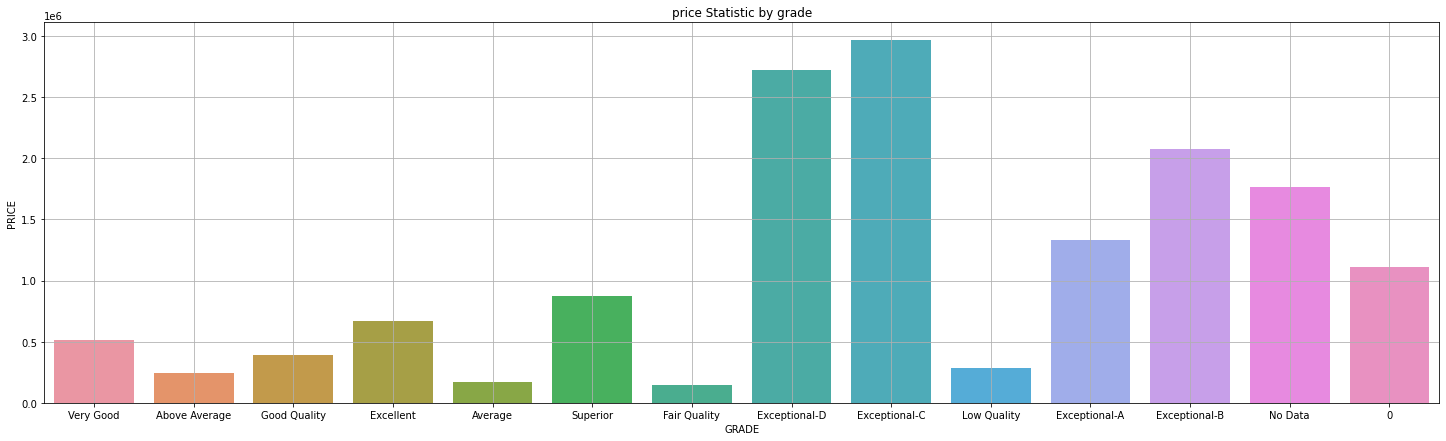

In [45]:
plt.figure(figsize=(25,7))
sns.barplot(data = df, x = "GRADE", y = "PRICE", ci = None)

plt.title('price Statistic by grade')
plt.grid()

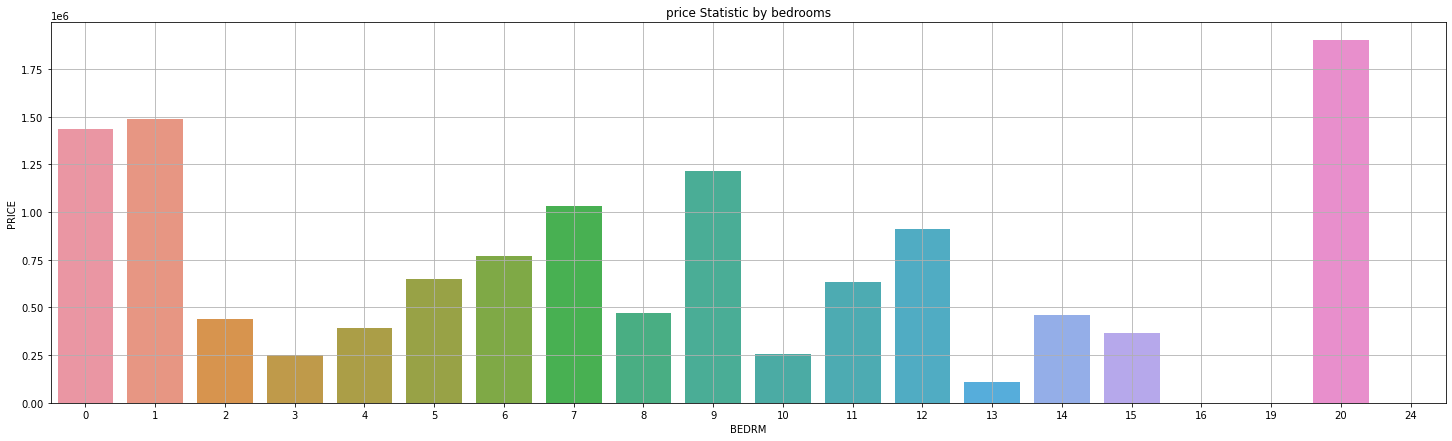

In [46]:
plt.figure(figsize=(25,7))
sns.barplot(data = df, x = "BEDRM", y = "PRICE", ci = None)

plt.title('price Statistic by bedrooms')
plt.grid()

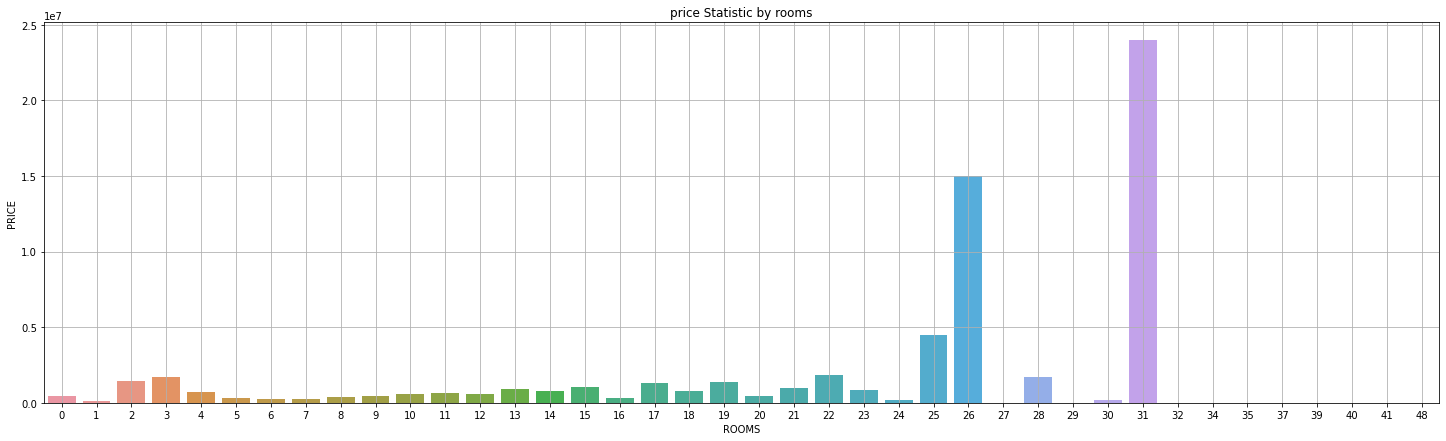

In [47]:
plt.figure(figsize=(25,7))
sns.barplot(data = df, x = "ROOMS", y = "PRICE", ci = None)

plt.title('price Statistic by rooms')
plt.grid()

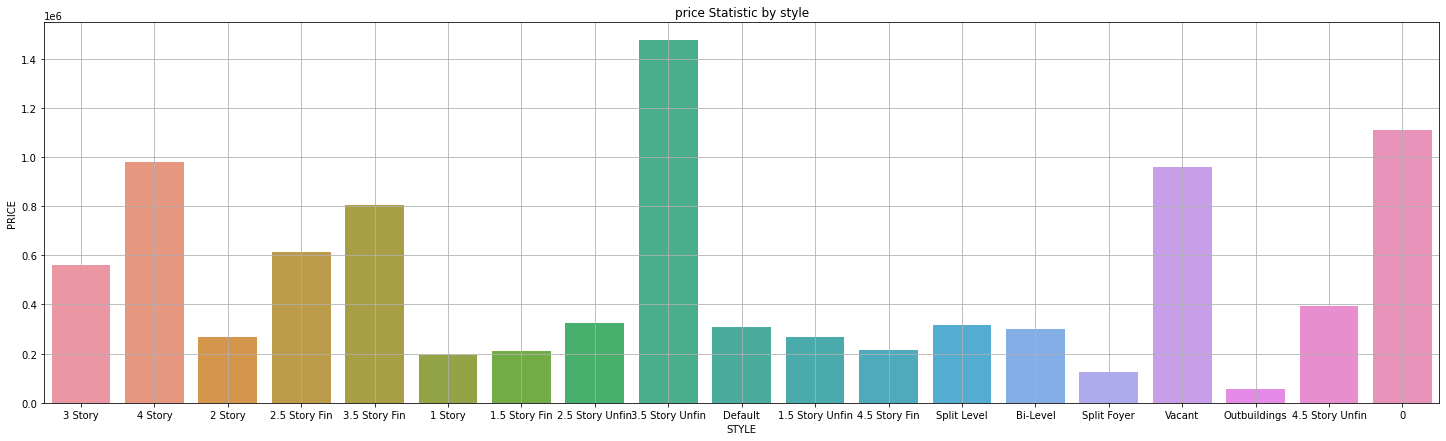

In [48]:
plt.figure(figsize=(25,7))
sns.barplot(data = df, x = "STYLE", y = "PRICE", ci = None)

plt.title('price Statistic by style')
plt.grid()

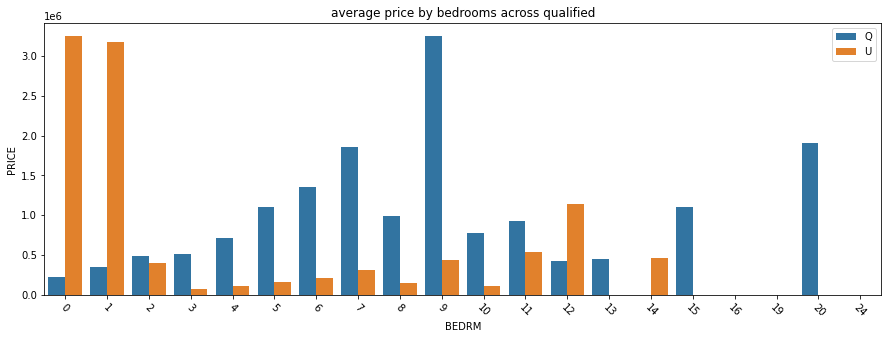

In [49]:
plt.figure(figsize=(15,5))

sns.barplot(data = df, x = "BEDRM", y = "PRICE", hue = "QUALIFIED", ci = None)

plt.xticks(rotation = -45)
plt.title( 'average price by bedrooms across qualified')
plt.legend(loc = 'upper right')

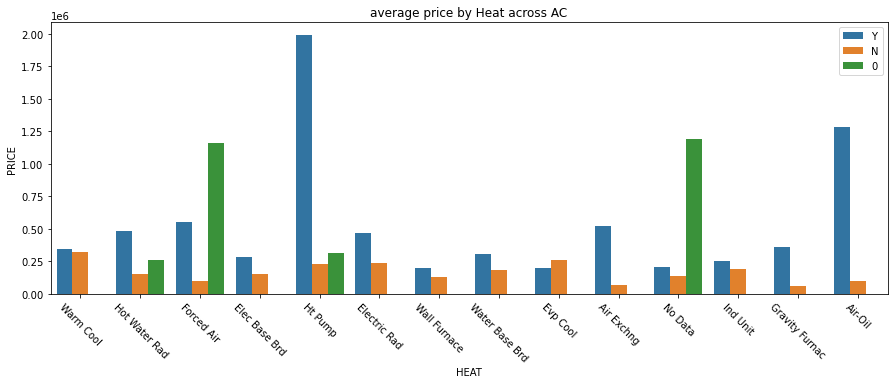

In [50]:
plt.figure(figsize=(15,5))

sns.barplot(data = df, x = "HEAT", y = "PRICE", hue = "AC", ci = None)

plt.xticks(rotation = -45)
plt.title( 'average price by Heat across AC')
plt.legend(loc = 'upper right')